In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
# import data that will be used

# PCA dataset

In [18]:
pca_data = pd.read_csv("data_pca.csv")
pca_data.head()

,Unnamed: 0,0,Y_rating
0,0,-11055.747792,0.333333
1,1,-11055.590692,0.555556
2,2,-11055.511877,0.888889
3,3,-11055.693838,0.777778
4,4,-11055.423012,0.777778


## Random Forest Regression Model applied to PCA data 

It is a type of ensemble learning method that combines multiple decision trees to make more accurate predictions.The algorithm takes the input features and passes them through each decision tree in the forest. Each tree produces a prediction, and the final prediction is then determined by averaging the predictions of all the trees.PCA can be useful for random forest regression models when dealing with datasets that have a large number of features or when there is a high degree of correlation with multiple independent variables between the features. By reducing the number of features, PCA can improve the model's performance by reducing the risk of overfitting

In [76]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [77]:
# Split data into features and target
X = pca_data.drop('Y_rating', axis=1)
y = pca_data['Y_rating']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)



The range of the mean squared error (MSE) value depends on the range of the target variable in the dataset. Since the MSE measures the average of the squared differences between the predicted and actual values, its value is influenced by the scale of the target variable. A low mean squared error (MSE) value indicates that the predicted values of a model are close to the actual values. 

In [74]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)

Mean Squared Error: 0.05098610474075087


In [75]:
target_range = (pca_data["Y_rating"].min(), pca_data["Y_rating"].max())
# Print the range
print("Y_rating range:", target_range)

Y_rating range: (0.0, 1.0)


R2 is a commonly used evaluation metric for regression models, and it ranges from 0 to 1. The higher the R2 value, the better the model fits the data. An R2 value of 1 indicates that the model is a perfect fit for the data, and it can explain 100% of the variance in the dependent variable.

In [21]:
# Calculate R-squared on the training set
r2_train = model.score(X_train, y_train)

print("R-squared on training set:", r2_train)

R-squared on training set: 0.8546400948029629


In a random forest regressor model, the RMSE value represents the average distance between the predicted and actual values of the target variable across all the decision trees in the forest. A lower RMSE value indicates that the model is making more accurate predictions.

In [22]:
# Print the RMSE
print("RMSE:", rmse)

RMSE: 0.24323399601682907


# Visual interpretations of results

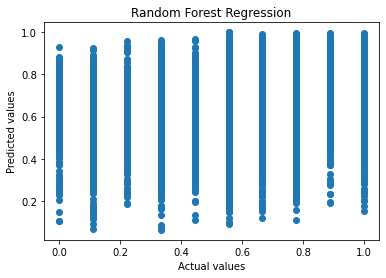

In [25]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual versus predicted values
plt.scatter(y_test, y_pred)

# Add labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regression')

# Show the plot
plt.show()


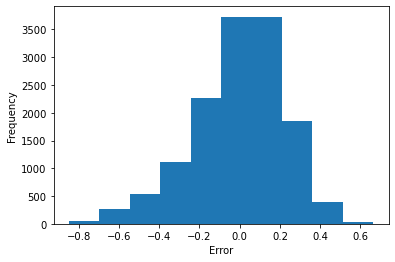

In [58]:
# calculate the errors (difference between predicted and actual values)
errors = np.array(y_test) - np.array(y_pred)

# create a histogram of the errors
plt.hist(errors, bins=10)

# set labels for the x and y axes
plt.xlabel('Error')
plt.ylabel('Frequency')

# display the plot
plt.show()

In [29]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [30]:
rf_model = RandomForestRegressor()

In [44]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

In [45]:
# fit the GridSearchCV object to the data
grid_search.fit(X[:100], y[:100])

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [72]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.17980311620090278


In [73]:
best_rf_model = RandomForestRegressor(**grid_search.best_params_)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [48]:
# Make predictions with new model on the test data
new_y_pred = best_rf_model.predict(X_test)
new_rmse = mean_squared_error(y_test, new_y_pred, squared=False)

# Calculate mean squared error (MSE)
new_mse = mean_squared_error(y_test, new_y_pred)

print('New Mean Squared Error:', new_mse)

New Mean Squared Error: 0.05063377683292188


In [49]:
# Calculate R-squared with new model on the training set
new_r2_train = best_rf_model.score(X_train, y_train)

print("New R-squared on training set:", new_r2_train)

New R-squared on training set: 0.16294844228999728


In [50]:
# Print the RMSE
print("New RMSE:", new_rmse)

New RMSE: 0.22501950322787997


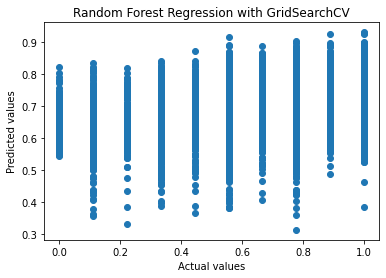

In [51]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual versus predicted values
plt.scatter(y_test, new_y_pred)

# Add labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regression with GridSearchCV')

# Show the plot
plt.show()

# Test

In [59]:
test = pd.read_csv("test.csv")
test.head()

,userId_movieId
0,469_2124
1,439_3753
2,522_1682
3,429_1217
4,71_1210


In [60]:
test[['userId', 'movieId']] = test["userId_movieId"].apply(lambda x: pd.Series(str(x).split("_")))
test = test.drop('userId_movieId', axis=1)
test.head()

,userId,movieId
0,469,2124
1,439,3753
2,522,1682
3,429,1217
4,71,1210


In [61]:
# create a DataFrame with the actual and predicted values
data = {'userId_movieId': y, 'rating': best_rf_model.predict(X)}
new_df = pd.DataFrame(data)

In [63]:
new_df.head()

,userId_movieId,rating
0,0.777778,0.712697
1,1.000000,0.719787
2,0.777778,0.617279
3,1.000000,0.746643
4,0.555556,0.582447


In [64]:
pred = best_rf_model.predict(test)

In [69]:
results = test.copy()
results

,userId,movieId
0,469,2124
1,439,3753
2,522,1682
3,429,1217
4,71,1210
...,...,...
29997,305,2599
29998,22,2109
29999,534,2947
30000,558,4085


In [70]:
results['userId_movieId'] = results.userId.astype(str).str.cat(results.movieId.astype(str), sep='_')
results = results.drop(['userId', 'movieId'], axis=1)
results["rating"] = pred
results

,userId_movieId,rating
0,469_2124,0.692657
1,439_3753,0.690572
2,522_1682,0.687689
3,429_1217,0.699194
4,71_1210,0.564637
...,...,...
29997,305_2599,0.674682
29998,22_2109,0.568833
29999,534_2947,0.692245
30000,558_4085,0.695110


In [71]:
results.to_csv('argueta_submission.csv',index=False)